The data (sample) were collected in São Paulo — Brazil, in a university area, where there are some parties with groups of students from 18 to 28 years of age (average). The dataset used for this activity has 7 features, with data measured over a period of one year.

https://www.kaggle.com/michau96/when-brazilian-students-drink-beer/data

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette("vlag")

In [2]:
beer = pd.read_csv('Consumo_cerveja.csv')

In [3]:
beer.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [4]:
beer.tail()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
beer.isna().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

#### 576 rows of empty data, will remove these.

In [6]:
beer = beer.dropna()

In [7]:
beer.tail()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467
364,2015-12-31,"24,76","20,2",29,0,0.0,22.446


#### Converting column titles to english

In [8]:
beer.columns = ['Date','Med Temp (C)','Min Temp (C)','Max Temp (C)','Precipitation (mm)','W/E','Beer Consumption (L)']

In [9]:
beer.head(1)

,Date,Med Temp (C),Min Temp (C),Max Temp (C),Precipitation (mm),W/E,Beer Consumption (L)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461


#### Fixing numerical columns to be values instead of strings

In [10]:
beer.loc[:,'Med Temp (C)':'Precipitation (mm)'] = beer.loc[:,'Med Temp (C)':'Precipitation (mm)'].applymap(lambda x: float(x.replace(',','.')))

In [11]:
beer.head(1)

,Date,Med Temp (C),Min Temp (C),Max Temp (C),Precipitation (mm),W/E,Beer Consumption (L)
0,2015-01-01,27.3,23.9,32.5,0.0,0.0,25.461


#### Data has a date column, will convert this to datetime and then set as index.

In [12]:
beer.Date = pd.to_datetime(beer.Date)

In [13]:
beer.set_index(beer.Date,inplace=True)

In [14]:
beer.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [15]:
beer.drop('Date',axis=1,inplace=True)

In [16]:
beer.head()

,Med Temp (C),Min Temp (C),Max Temp (C),Precipitation (mm),W/E,Beer Consumption (L)
Date,,,,,,
2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


### To begin with, we can look at the spread of temperature data present.

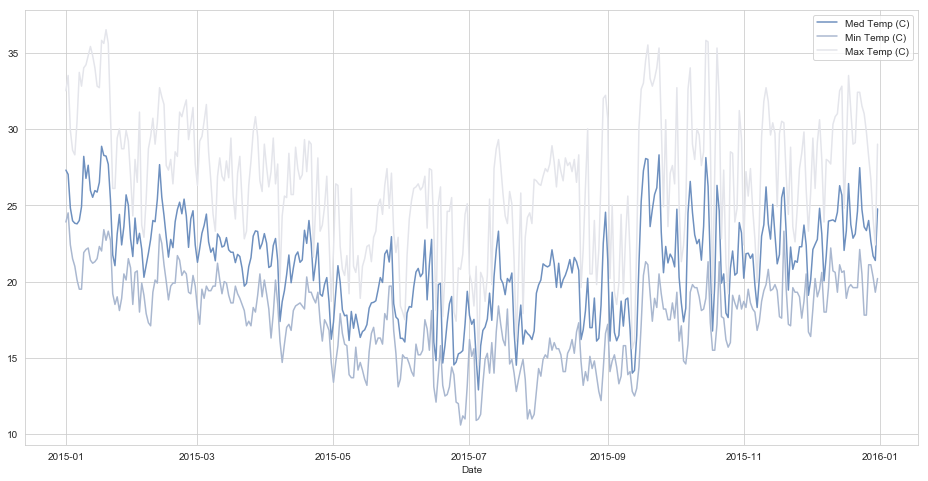

In [172]:
plt.figure(figsize=(16,8))
sns.lineplot(data=beer.iloc[:,0:3], dashes=False, linewidth=1.5)

In [30]:
beer['Med Temp (C)'].apply(['min','max'])

min    12.90
max    28.86
Name: Med Temp (C), dtype: float64

The coldest months are from May - August, their winter, and increase through Spring to reach their maximum in summer Jan - March.

### How rainy is it in Sao Paolo?

In [74]:
print(f'It rains {"{:.2f}".format(float((beer["Precipitation (mm)"]!=0).sum()/len(beer["Precipitation (mm)"])*100))}% of the time in Sao Paolo.')

It rains 40.27% of the time in Sao Paolo.


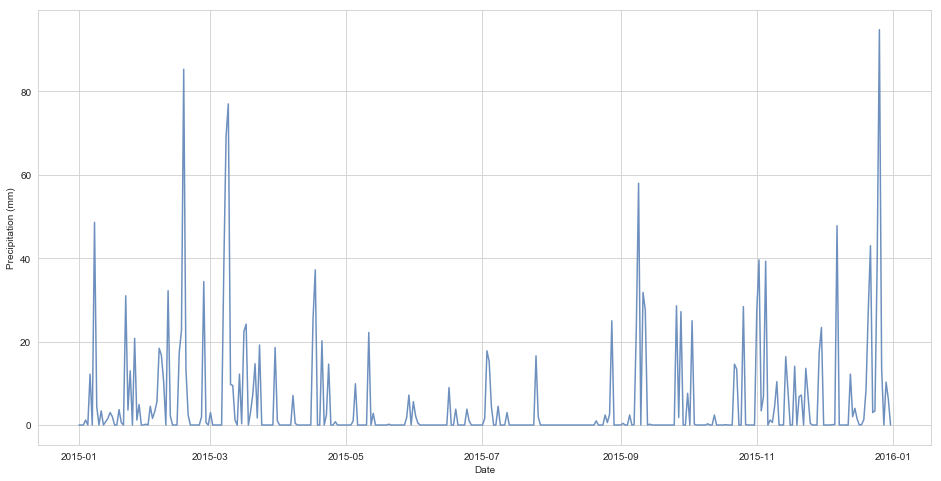

In [173]:
plt.figure(figsize=(16,8))
sns.lineplot(x=beer.index, y=beer["Precipitation (mm)"], dashes=False, linewidth=1.5)

The rainfall occurs fairly irregularly but when it comes it appears to come in high volumes. 

In [145]:
precip = beer["Precipitation (mm)"].copy()

In [146]:
precip[precip>0]=1

In [147]:
round((precip.resample("M").mean())*100,2).astype(str)+'%'

Date
2015-01-31    58.06%
2015-02-28    60.71%
2015-03-31    58.06%
2015-04-30    26.67%
2015-05-31    25.81%
2015-06-30     20.0%
2015-07-31    25.81%
2015-08-31    16.13%
2015-09-30    36.67%
2015-10-31    32.26%
2015-11-30    63.33%
2015-12-31    61.29%
Freq: M, Name: Precipitation (mm), dtype: object

We can see that the winter months are the driest, with the months of November - March being the wettest.

In [143]:
monthly

Date
2015-01-31    58.06%
2015-02-28    60.71%
2015-03-31    58.06%
2015-04-30    26.67%
2015-05-31    25.81%
2015-06-30     20.0%
2015-07-31    25.81%
2015-08-31    16.13%
2015-09-30    36.67%
2015-10-31    32.26%
2015-11-30    63.33%
2015-12-31    61.29%
Freq: M, Name: Precipitation (mm), dtype: object

### During which months is the most beer drunk?

In [268]:
consump = beer["Beer Consumption (L)"].copy()

In [269]:
consump = consump.resample("M").sum()

In [270]:
consump = consump.reset_index()

In [266]:
consump.Date = consump.set_index(consump.Date.dt.strftime('%b'))

In [272]:
consump.Date = consump.Date.dt.strftime('%b')

In [273]:
consump

,Date,Beer Consumption (L)
0,Jan,889.007
1,Feb,718.848
2,Mar,776.128
3,Apr,738.723
4,May,706.750
5,Jun,708.812
6,Jul,699.759
7,Aug,803.178
8,Sep,755.944
9,Oct,857.249


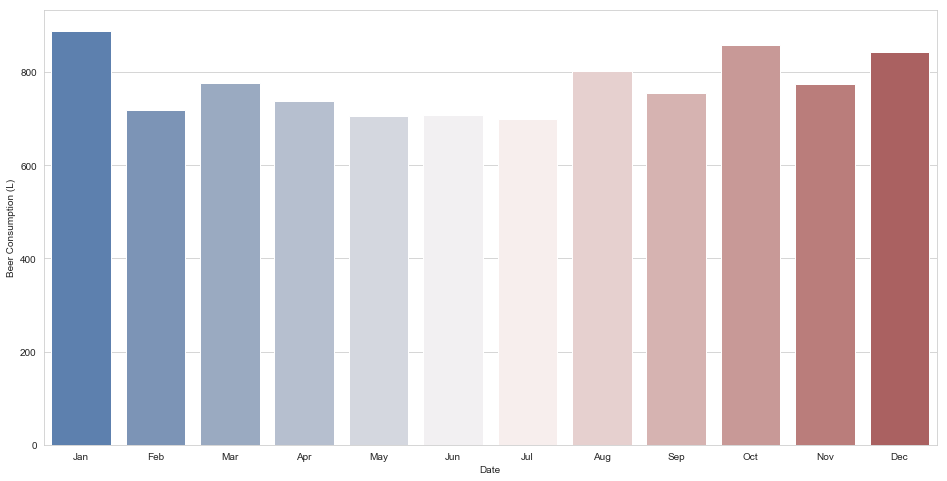

In [276]:
plt.figure(figsize=(16,8))
sns.barplot(x='Date',y='Beer Consumption (L)', data=consump,palette='vlag')

In [150]:
consump.resample("M").sum()

Date
2015-01-31    889.007
2015-02-28    718.848
2015-03-31    776.128
2015-04-30    738.723
2015-05-31    706.750
2015-06-30    708.812
2015-07-31    699.759
2015-08-31    803.178
2015-09-30    755.944
2015-10-31    857.249
2015-11-30    774.846
2015-12-31    842.255
Freq: M, Name: Beer Consumption (L), dtype: float64

As we can see from the above, beer consumption is highest from the months of August-January, or spring-summer.
This would correlate with the rising temperatures through these seasons, suggesting a relationship between temperature and consumption.

### How does the weekend effect consumption?

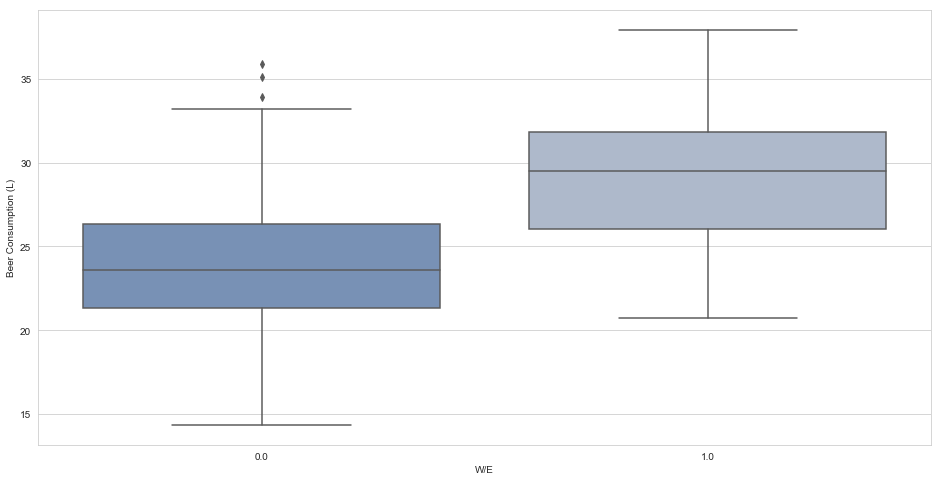

In [296]:
plt.figure(figsize=(16,8))
sns.boxplot(x='W/E',y='Beer Consumption (L)',data=beer)

In [298]:
beer[['W/E','Beer Consumption (L)']].groupby(['W/E']).median()

,Beer Consumption (L)
W/E,
0.0,23.6140
1.0,29.4825


Unsurpisingly, we can see that the weekend has a fairly large effect on the volume of beer drunk - 25% increase in median volume drunk over the weekend!

### How does rain effect consumption?

In [299]:
precbeer = beer[['Precipitation (mm)','Beer Consumption (L)']].copy()

In [300]:
precbeer['Precipitation (mm)'][precbeer['Precipitation (mm)']>0]=1

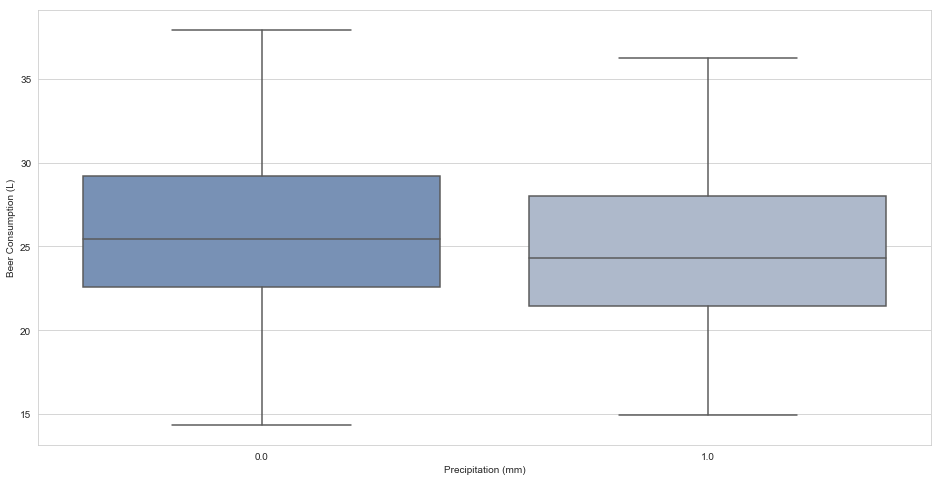

In [306]:
plt.figure(figsize=(16,8))
sns.boxplot(x='Precipitation (mm)',y='Beer Consumption (L)',data=precbeer)

In [304]:
precbeer[['Precipitation (mm)','Beer Consumption (L)']].groupby(['Precipitation (mm)']).median()

,Beer Consumption (L)
Precipitation (mm),
0.0,25.47
1.0,24.33


It does make some difference, 4.67% more drunk when there is no rain present.

### How does temperature affect beer consumption?

<Figure size 1152x1152 with 0 Axes>

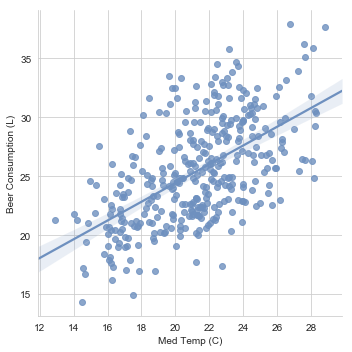

In [313]:
plt.figure(figsize=(16,16))
sns.lmplot(x='Med Temp (C)',y='Beer Consumption (L)',data=beer)

In [314]:
beer[['Med Temp (C)','Beer Consumption (L)']].corr()

,Med Temp (C),Beer Consumption (L)
Med Temp (C),1.000000,0.574615
Beer Consumption (L),0.574615,1.000000


Positive correlation, r value of 0.575.

## Creating a model to predict beer consumption

I'll be creating a linear regression model for this, so first I want to see what features are heavily correlated so I can omit these to avoid the problem of collinearity.

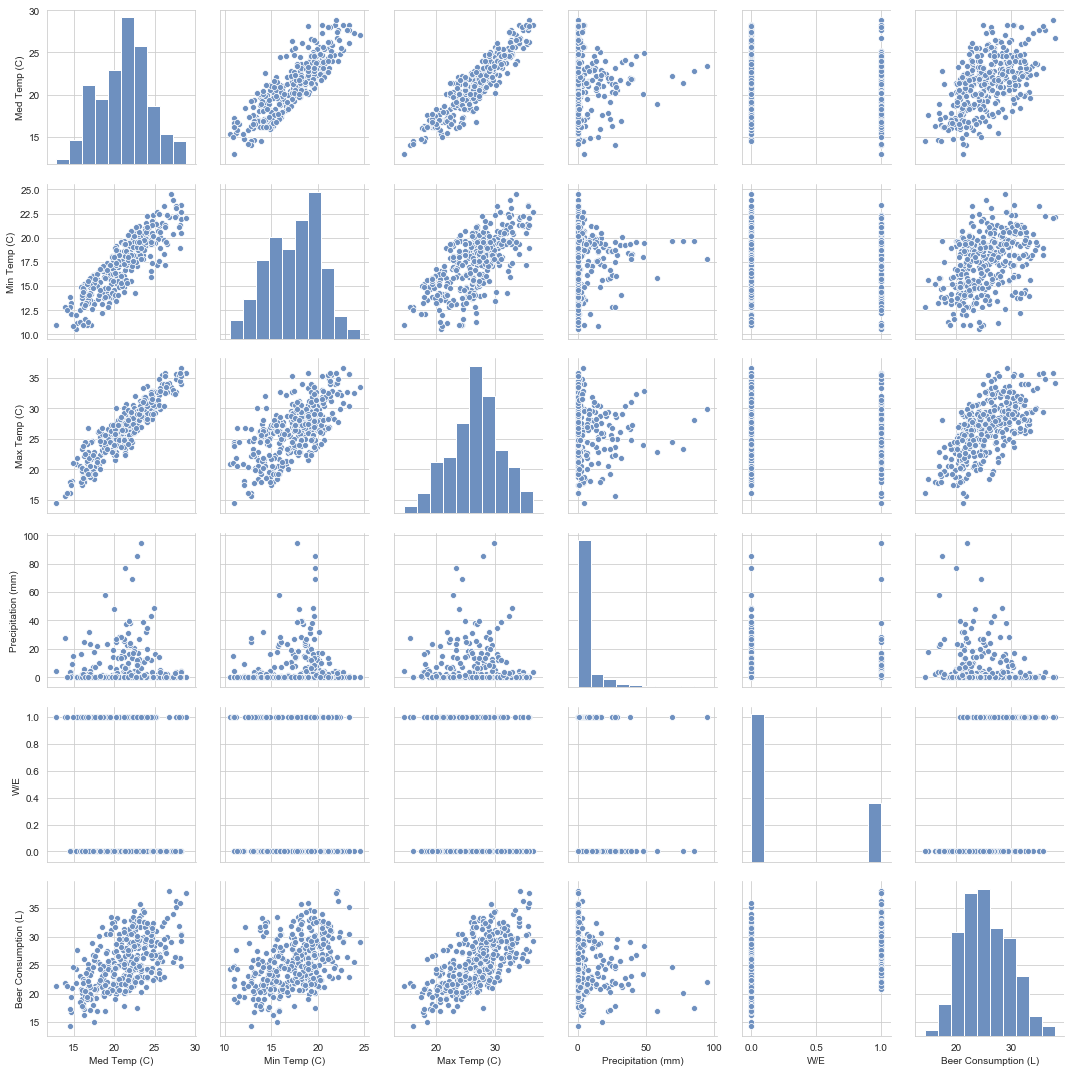

In [315]:
sns.pairplot(beer)

Unsurprisingly, our temperature features are all heavily correlated with one another. I'll just use the median value to create my model.

#### Importing the necessary libraries.

In [329]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [324]:
y = beer['Beer Consumption (L)']
X = beer[['Med Temp (C)','Precipitation (mm)','W/E']]

In [325]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 50)

In [326]:
lm = LinearRegression()

In [327]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [328]:
y_predicted = lm.predict(X_test)

In [330]:
print(f'R^2: %.2f' %metrics.r2_score(y_test, y_predicted))

R^2: 0.71


In [334]:
print(f'MSE: %.2f' %metrics.mean_squared_error(y_test, y_predicted))

MSE: 5.22


In [333]:
#The MSE can be converted to the RSS by multiplying by n observations
RSS = metrics.mean_squared_error(y_test, y_predicted)*110

In [336]:
#The RSE is given as the sqrt of 1/(n-p-1) * RSS
RSE = np.sqrt((1/(110-3-1))*RSS)

In [337]:
#By dividing RSE by the mean of the population we can obtain a percentage error
percerror = (RSE/np.mean(y_test))*100

In [338]:
print(f'RSS: {RSS:.2f}, RSE: {RSE:.2f}, % Error: {percerror:.2f}')

RSS: 792.79, RSE: 2.73, % Error: 10.80


Model seems to perform fairly well, explains 70% of the change in our response. % error is not wildly high either.